# Finance Data Project 

The main focus of this project will be on the exploratory data analysis of stock prices. Tracking bank stocks and their individual progression throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) extending all the way to 2016. This project is meant to leverage data visualization to draw key insights while organizing the data using various Data Science techniques. This is not meant to be a robust financial analysis or be taken as financial advice. 

### Importing Required Libraries 

In [31]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import seaborn as sns 
%matplotlib inline

## Data

We are interested in the stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Obtaining data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Each bank will be assigned to a separate dataframe, with the variable name for that bank being its ticker symbol. 


In [32]:
# intialize start and end dates
start = datetime.datetime(2006, 1, 1) 
end = datetime.datetime(2016, 1, 1)

In [33]:
# Obtain each banks date through Yahoo for the desired time period of 01/01/2006 - 01/01/2016

# Bank of America
BAC = data.DataReader("BAC", 'yahoo', start, end)

# CitiGroup
C = data.DataReader("C", 'yahoo', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'yahoo', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'yahoo', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'yahoo', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'yahoo', start, end)

** Create a list of the ticker symbols (as strings) in alphabetical order **

In [34]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

** Concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list.**

In [35]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)

** Set the column name levels **

In [36]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe **

In [37]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   35.298687  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   34.923801  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   34.968796  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   34.916302  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   34.938789  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  37.429329  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  37.455013  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  37.557716  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  37.596241  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  37.994202  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.904305  
2006-01-04   31.799999  31.530001  10870000.0  20.661839  
2006-01-05   31.500000  31.495001  10158000.0  20.638908  
2006-01-06   31.580000  31.680000   8403800.0  20.760138  
2006-01-09   31.674999  31.674999   5619600.0  20.756863  

[5 rows x 36 columns]

# Exploratory Data Analysis 


** Max Close Price for each bank's stock throughout desired time period **

In [38]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock **

In [39]:
returns = pd.DataFrame()

** Created a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame**

In [40]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


** Create a pairplot using seaborn of the returns dataframe**

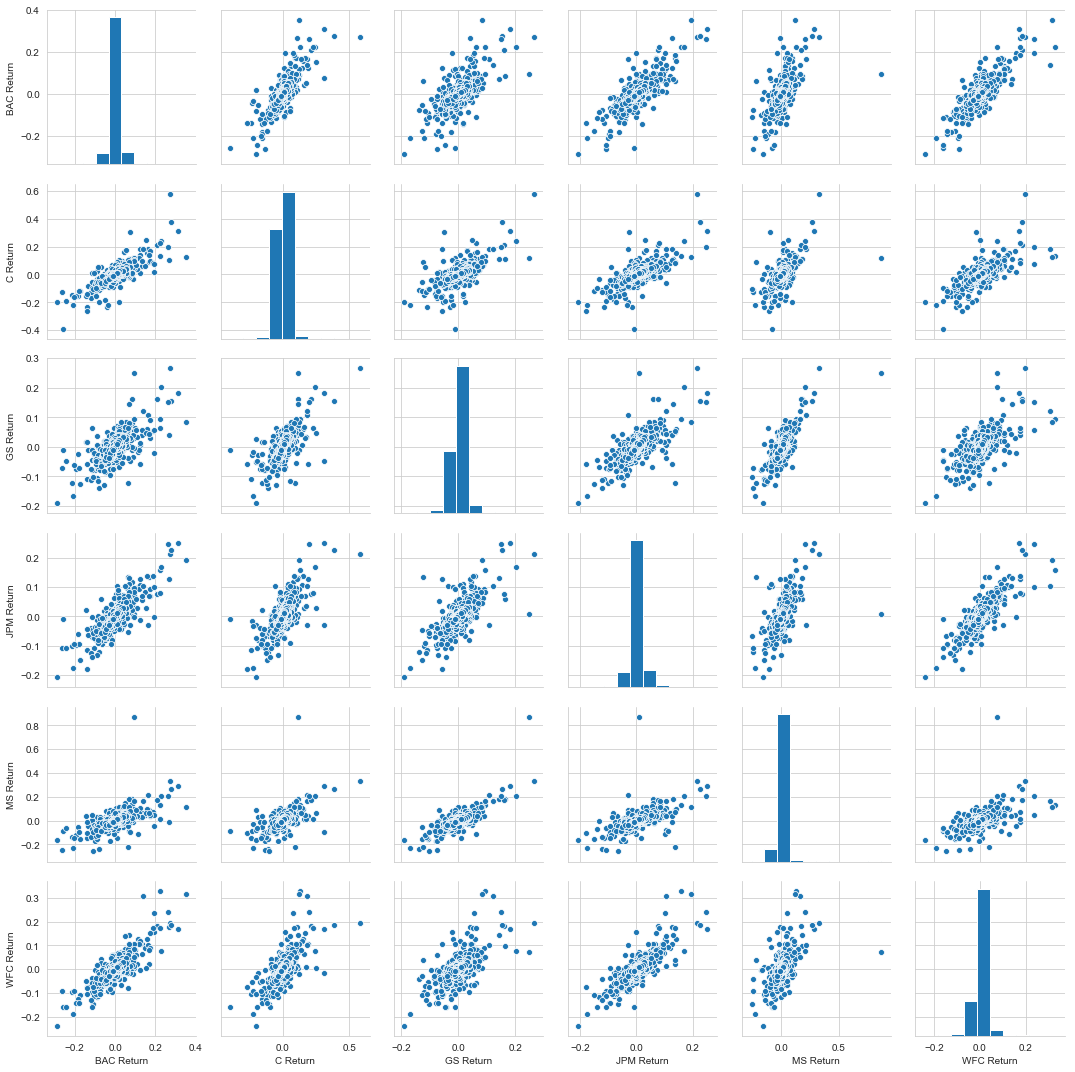

In [41]:
sns.pairplot(returns[1:])

** Each Bank's worst single day return**

In [42]:
returns.idxmin() 

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

#### At a glance we can see that 4 Banks have the exact same date for the worst single day return. We conclude that the significance of this date has a direct link with Obama's Inauguration, which was January 20, 2009. 

** Each Bank's best single day return **

In [43]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

** Taking a look at the standard deviation for insight into the riskiest stocks **

In [44]:
returns.std() 

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

** Standard deviation of returns in 2015 for post-financial crisis volatility ** 

In [48]:
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

#### Investors often use standard deviation as a measure of volatility: the more a stock's return vary from the stock's average return, the more volatile the stock. Since Citibank has the highest standard deviation, it's safe to assume it will be the most volatile and the returns values will fluctuate within a larger range.

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

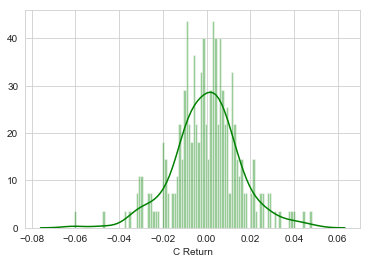

In [54]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31']["C Return"], color = "green", bins = 100)

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

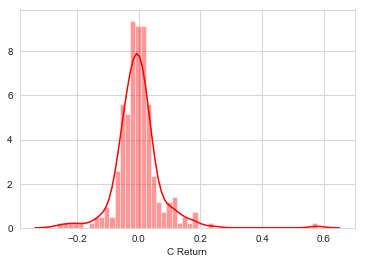

In [51]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31']["C Return"], color = "red", bins = 50)

### Imports for more Visualization

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

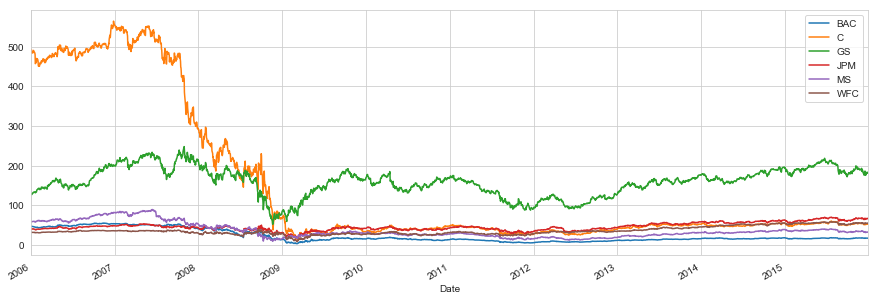

In [19]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].plot(figsize=(15,5), label = tick)
plt.legend()

#### We observe that Citibank started off with the highest closing price up until 2008, where the stock's closing price dipped as low as BAC, JPM, MS, and WFC and never returned to the initial closing value. With a peak price of 575 in 2007 and a drop to 63.89 in 2015, this is attributed to Citibank holding massive derivative portfolios, primarily made up of Collaterized Debt Obligations (CDO) and Mortgage Bank Securities (MBS). The majority of CDO's and MBS's were subprime, meaning the loans that made up the mortgages were leant to people who would have difficulty repaying. As a result of this and little focus put on risk management, Citibank was on the verge of bankruptcy having their shares trading below $1.

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

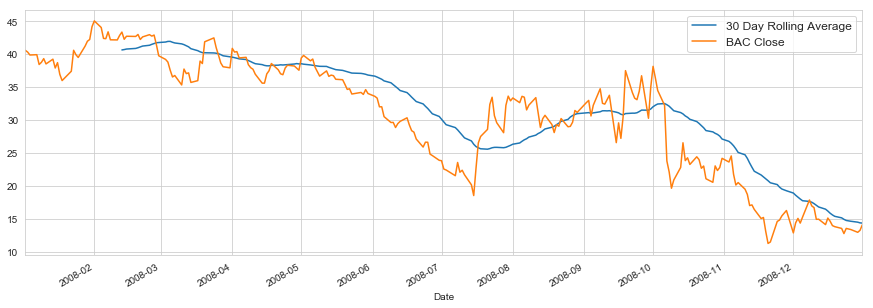

In [20]:
plt.figure(figsize = (15,5))
BAC["Close"].loc['2008-01-01':'2009-01-01'].rolling(window = 30).mean().plot(label = "30 Day Rolling Average")
BAC["Close"].loc['2008-01-01':'2009-01-01'].plot(label = "BAC Close")
plt.legend(prop={"size":12})

** Create a heatmap of the correlation between the stocks Close Price.**

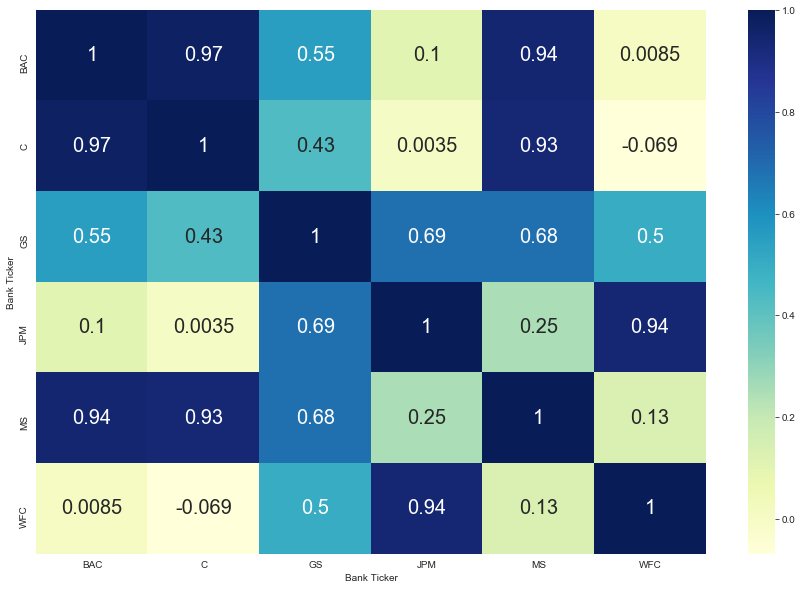

In [21]:
plt.figure(figsize = (15,10))
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(), annot = True, annot_kws ={"size": 20}, cmap = "YlGnBu")

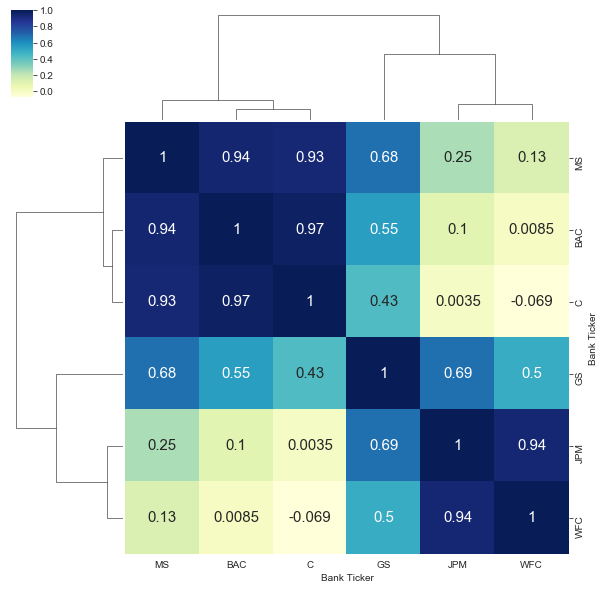

In [22]:
#Clustermapping is hierarchical clustering: Clustering those of the same categories together 
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(), annot = True, annot_kws ={"size": 15}, cmap = "YlGnBu")

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [ ]:
import cufflinks as cf
cf.go_offline()
BAC[['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [ ]:
MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [ ]:
BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')